## Letter Chunks Model: Mallet

## Resources

In [11]:
import pickle
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path

In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

## Get Data

In [24]:
# Get it back
with open("20240608_PhD_LtrChkLem-N.txt", "rb") as fp:   # Unpickling
    data_lemmatizedNouns = pickle.load(fp)

In [25]:
len(data_lemmatizedNouns)

2392

In [26]:
# Get it back
#with open("20240405_PhD_LtrLem-NV.txt", "rb") as fp:   # Unpickling
    #data_lemmatized = pickle.load(fp)

In [27]:
#len(data_lemmatized[0])

This code adapted from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

## 1. LDA Mallet (Nouns Only)

In [28]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedNouns)

# Create Corpus
texts = data_lemmatizedNouns

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [29]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(6541 unique tokens: ['air', 'apron', 'bye', 'ceremony', 'cermony']...)


In [1]:
# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
#                                                        corpus=corpus, 
#                                                        texts=data_lemmatizedNouns, 
#                                                        start=5, 
#                                                        limit=30, 
#                                                        step=1)

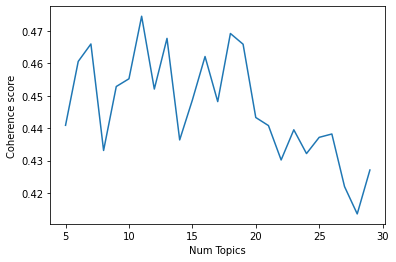

In [33]:
# Show graph
limit=30; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [34]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.4409
Num Topics = 6 Coherence:  0.4606
Num Topics = 7 Coherence:  0.4659
Num Topics = 8 Coherence:  0.4331
Num Topics = 9 Coherence:  0.4528
Num Topics = 10 Coherence:  0.4552
Num Topics = 11 Coherence:  0.4745
Num Topics = 12 Coherence:  0.4521
Num Topics = 13 Coherence:  0.4677
Num Topics = 14 Coherence:  0.4364
Num Topics = 15 Coherence:  0.4487
Num Topics = 16 Coherence:  0.4621
Num Topics = 17 Coherence:  0.4482
Num Topics = 18 Coherence:  0.4692
Num Topics = 19 Coherence:  0.4659
Num Topics = 20 Coherence:  0.4433
Num Topics = 21 Coherence:  0.4408
Num Topics = 22 Coherence:  0.4302
Num Topics = 23 Coherence:  0.4395
Num Topics = 24 Coherence:  0.4322
Num Topics = 25 Coherence:  0.4372
Num Topics = 26 Coherence:  0.4382
Num Topics = 27 Coherence:  0.422
Num Topics = 28 Coherence:  0.4136
Num Topics = 29 Coherence:  0.4271


In [35]:
# Coherence for 11-topic model
print(coherence_values[6])

# Topics for 11-topic model
malletModel_11 = model_list[6]
model_topics_11 = malletModel_11.show_topics(formatted=False)
pprint(sorted(malletModel_11.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA11 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_11)

# Visualize the topics
pyLDAvis.enable_notebook()
vis11 = pyLDAvis.gensim.prepare(MalletLDA11, corpus, id2word, sort_topics=False)
vis11

0.47447367517488337
[(0,
  '0.121*"day" + 0.084*"place" + 0.057*"winter" + 0.052*"time" + '
  '0.048*"summer" + 0.042*"town" + 0.034*"month" + 0.034*"weather" + '
  '0.025*"spring" + 0.020*"health" + 0.020*"account" + 0.016*"fall" + '
  '0.016*"snow" + 0.013*"business" + 0.012*"change" + 0.012*"deal" + '
  '0.011*"climate" + 0.010*"heat" + 0.010*"frost" + 0.009*"rain"'),
 (1,
  '0.062*"house" + 0.037*"room" + 0.021*"tree" + 0.020*"bed" + 0.020*"woman" + '
  '0.019*"road" + 0.019*"garden" + 0.019*"side" + 0.015*"fire" + 0.014*"table" '
  '+ 0.014*"lot" + 0.014*"order" + 0.013*"door" + 0.013*"building" + '
  '0.012*"lady" + 0.011*"description" + 0.011*"servant" + 0.011*"window" + '
  '0.010*"walk" + 0.010*"view"'),
 (2,
  '0.064*"land" + 0.052*"pound" + 0.050*"dollar" + 0.047*"money" + '
  '0.042*"year" + 0.035*"country" + 0.034*"acre" + 0.032*"farm" + 0.017*"cent" '
  '+ 0.016*"price" + 0.016*"crop" + 0.016*"wheat" + 0.012*"cost" + '
  '0.012*"bushel" + 0.012*"market" + 0.012*"farmer" +

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.241293  0.097288       1        1   9.042929
1      0.062841  0.117024       2        1   8.942038
2      0.260920  0.039700       3        1  10.002044
3      0.040036  0.025137       4        1   8.823394
4     -0.139143 -0.241153       5        1   8.961745
5     -0.147813  0.215384       6        1   9.036184
6     -0.017199 -0.219965       7        1   8.979686
7     -0.226242 -0.031468       8        1   8.866722
8      0.049665  0.198780       9        1   9.316638
9      0.254523  0.020415      10        1   9.211756
10     0.103703 -0.221144      11        1   8.816864, topic_info=        Term         Freq        Total Category  logprob  loglift
11    letter  1462.000000  1462.000000  Default  30.0000  30.0000
8        day  1463.000000  1463.000000  Default  29.0000  29.0000
55      time  1573.000000  1573.000000  Default  28.0000  28.0000
304    child   753.000000   753.000000  Default  27.0000  27.0000
112  country  1001.000000  1001.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
58     visit    97.776925   200.807211  Topic11  -4.3605   1.7088
28   account   103.952309   261.188724  Topic11  -4.2992   1.5072
110    woman    69.987693   225.370610  Topic11  -4.6948   1.2591
408   father    74.104617   260.090340  Topic11  -4.6377   1.1730
75   trouble    48.373847   229.240509  Topic11  -5.0642   0.8727

[710 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1018      9  1.003151     abundance
28        1  0.597269       account
28        4  0.003829       account
28       11  0.398180       account
271       5  1.004139  acquaintance
...     ...       ...           ...
715       9  0.996626          yard
59        3  0.353815          year
59       10  0.295010          year
59       11  0.350875          year
60        6  0.999255     yesterday

[830 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

## 2. Range of alphas

In [36]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for alpha in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, id2word=id2word, alpha=alpha, random_seed=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [2]:
# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
#                                                        corpus=corpus, 
#                                                        texts=data_lemmatizedNouns, 
#                                                        start=1, 
#                                                        limit=52, 
#                                                        step=4)

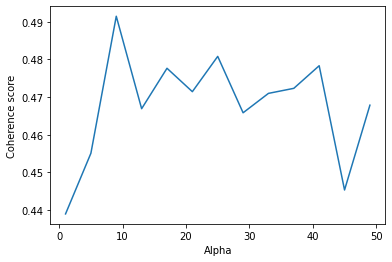

In [38]:
# Show graph
limit=50; start=1; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Alpha")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [39]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Alpha =", m, 'Coherence: ', round(cv, 4))

Alpha = 1 Coherence:  0.439
Alpha = 5 Coherence:  0.4551
Alpha = 9 Coherence:  0.4915
Alpha = 13 Coherence:  0.4669
Alpha = 17 Coherence:  0.4777
Alpha = 21 Coherence:  0.4714
Alpha = 25 Coherence:  0.4808
Alpha = 29 Coherence:  0.4658
Alpha = 33 Coherence:  0.471
Alpha = 37 Coherence:  0.4723
Alpha = 41 Coherence:  0.4783
Alpha = 45 Coherence:  0.4453
Alpha = 49 Coherence:  0.4679


In [40]:
# Coherence for alpha-9, 11-topic model
print(coherence_values[2])

# Topics for alpha-9 model, 11-topic model
malletModel_11a9 = model_list[2]
model_topics_11a9 = malletModel_11a9.show_topics(formatted=False)
pprint(sorted(malletModel_11a9.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA11a9 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_11a9)

# Visualize the topics
pyLDAvis.enable_notebook()
vis11a9 = pyLDAvis.gensim.prepare(MalletLDA11a9, corpus, id2word, sort_topics=False)
vis11a9

0.49146551100480473
[(0,
  '0.089*"day" + 0.051*"winter" + 0.047*"time" + 0.039*"summer" + '
  '0.036*"weather" + 0.028*"week" + 0.027*"health" + 0.026*"month" + '
  '0.018*"place" + 0.018*"spring" + 0.017*"snow" + 0.016*"town" + 0.014*"year" '
  '+ 0.012*"business" + 0.012*"rain" + 0.012*"home" + 0.011*"night" + '
  '0.011*"heat" + 0.011*"country" + 0.011*"house"'),
 (1,
  '0.055*"work" + 0.053*"dollar" + 0.037*"money" + 0.031*"day" + 0.027*"year" '
  '+ 0.023*"time" + 0.021*"pound" + 0.017*"business" + 0.017*"month" + '
  '0.016*"place" + 0.014*"man" + 0.014*"cent" + 0.012*"wage" + 0.012*"house" + '
  '0.012*"home" + 0.012*"country" + 0.012*"pay" + 0.012*"board" + 0.012*"week" '
  '+ 0.010*"property"'),
 (2,
  '0.050*"land" + 0.035*"pound" + 0.035*"acre" + 0.032*"country" + '
  '0.031*"farm" + 0.030*"year" + 0.016*"crop" + 0.016*"price" + 0.016*"wheat" '
  '+ 0.013*"money" + 0.012*"bushel" + 0.012*"potato" + 0.012*"market" + '
  '0.012*"farmer" + 0.010*"wood" + 0.009*"cow" + 0.009*"h

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.045672 -0.168062       1        1   8.744189
1     -0.057677 -0.189034       2        1   8.999267
2     -0.218035 -0.207027       3        1  10.264079
3      0.252535 -0.056887       4        1   9.150899
4      0.296503 -0.089776       5        1   9.598834
5     -0.243404  0.103709       6        1   8.797596
6     -0.016962  0.251444       7        1   8.292299
7      0.019240  0.109448       8        1   9.176300
8     -0.144628  0.145960       9        1   8.127382
9      0.182839  0.176519      10        1   9.945850
10    -0.116083 -0.076294      11        1   8.903306, topic_info=        Term         Freq        Total Category  logprob  loglift
11    letter  1503.000000  1503.000000  Default  30.0000  30.0000
55      time  1574.000000  1574.000000  Default  29.0000  29.0000
8        day  1473.000000  1473.000000  Default  28.0000  28.0000
30   brother   505.000000   505.000000  Default  27.0000  27.0000
136     work   618.000000   618.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
347  company    46.444766   161.199722  Topic11  -5.1147   1.1744
31      case    45.412660   146.026815  Topic11  -5.1371   1.2507
181     side    46.444766   200.425419  Topic11  -5.1147   0.9566
557  respect    42.316342   102.127771  Topic11  -5.2078   1.5377
255     town    42.316342   332.641769  Topic11  -5.2078   0.3569

[923 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
28        1  0.273723    account
28        2  0.215894    account
28        4  0.239025    account
28        5  0.208183    account
28       11  0.069394    account
...     ...       ...        ...
60        1  0.249333  yesterday
60        8  0.685666  yesterday
60        9  0.068567  yesterday
1368      3  0.993717      yield
5562      5  1.019872       youe

[1230 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

## 3. Range of iterations

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_iter in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, alpha=9, id2word=id2word, random_seed=10, iterations=num_iter)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [3]:
# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
#                                                        corpus=corpus, 
#                                                        texts=data_lemmatizedNouns, 
#                                                        start=500, 
#                                                        limit=5500, 
#                                                        step=500)

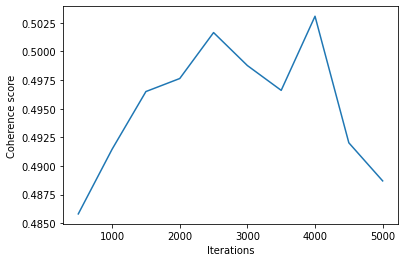

In [44]:
# Show graph
limit=5500; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Iterations")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [43]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Iterations =", m, 'Coherence: ', round(cv, 4))

Iterations = 500 Coherence:  0.4858
Iterations = 1000 Coherence:  0.4915
Iterations = 1500 Coherence:  0.4965
Iterations = 2000 Coherence:  0.4976
Iterations = 2500 Coherence:  0.5017
Iterations = 3000 Coherence:  0.4988
Iterations = 3500 Coherence:  0.4966
Iterations = 4000 Coherence:  0.5031
Iterations = 4500 Coherence:  0.492
Iterations = 5000 Coherence:  0.4887


In [4]:
#model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, alpha=9, id2word=id2word, random_seed=10, iterations=4000)
#coherencemodel = CoherenceModel(model=model, coherence='c_v', dictionary=id2word, corpus=corpus, texts=data_lemmatizedNouns)
#coherencemodel.get_coherence()

In [52]:
# Coherence for alpha-9, iteration 4k, 11-topic model
#coherencemodel.get_coherence()
print(coherence_values[7])

# Topics for alpha-9, iteration 4k, 11-topic model
#malletModel_11a9i4k = model
malletModel_11a9i4k = model_list[7]
model_topics_11a9i4k = malletModel_11a9i4k.show_topics(formatted=False)
pprint(sorted(malletModel_11a9i4k.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA11a9i4k = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_11a9i4k)

# Visualize the topics
pyLDAvis.enable_notebook()
vis11a9i4k = pyLDAvis.gensim.prepare(MalletLDA11a9i4k, corpus, id2word, sort_topics=False)
vis11a9i4k

[(0,
  '0.086*"day" + 0.054*"time" + 0.045*"winter" + 0.038*"summer" + '
  '0.037*"weather" + 0.030*"health" + 0.026*"week" + 0.023*"month" + '
  '0.020*"place" + 0.018*"country" + 0.018*"town" + 0.017*"spring" + '
  '0.017*"snow" + 0.012*"year" + 0.011*"rain" + 0.011*"fall" + 0.011*"frost" + '
  '0.011*"heat" + 0.009*"account" + 0.009*"climate"'),
 (1,
  '0.055*"dollar" + 0.053*"work" + 0.044*"money" + 0.031*"year" + 0.027*"day" '
  '+ 0.022*"time" + 0.021*"business" + 0.020*"pound" + 0.020*"week" + '
  '0.018*"month" + 0.017*"country" + 0.017*"cent" + 0.015*"house" + '
  '0.015*"board" + 0.014*"man" + 0.013*"place" + 0.012*"wage" + 0.012*"pay" + '
  '0.011*"property" + 0.011*"summer"'),
 (2,
  '0.046*"land" + 0.036*"pound" + 0.034*"acre" + 0.032*"farm" + '
  '0.026*"country" + 0.024*"year" + 0.016*"price" + 0.016*"crop" + '
  '0.016*"wheat" + 0.012*"bushel" + 0.012*"potato" + 0.012*"farmer" + '
  '0.011*"market" + 0.011*"wood" + 0.010*"money" + 0.010*"lot" + 0.010*"horse" '
  '+ 0.00

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.052019 -0.102518       1        1   8.699786
1      0.081068  0.080304       2        1   9.036533
2      0.217791  0.168766       3        1  10.287593
3     -0.197371 -0.068269       4        1   9.316317
4     -0.289022  0.005074       5        1   9.241339
5      0.213377 -0.132139       6        1   9.000159
6     -0.110691  0.149439       7        1   8.344433
7      0.013785 -0.270162       8        1   9.134786
8      0.166126 -0.121047       9        1   8.094276
9     -0.240181  0.025267      10        1   9.661735
10     0.093100  0.265286      11        1   9.183043, topic_info=         Term         Freq        Total Category  logprob  loglift
11     letter  1514.000000  1514.000000  Default  30.0000  30.0000
55       time  1581.000000  1581.000000  Default  29.0000  29.0000
8         day  1479.000000  1479.000000  Default  28.0000  28.0000
30    brother   513.000000   513.000000  Default  27.0000  27.0000
136      work   617.000000   617.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1964  capital    40.967813    66.757159  Topic11  -5.2711   1.8995
181      side    54.282352   199.284282  Topic11  -4.9897   1.0873
223     world    48.137180   221.389726  Topic11  -5.1098   0.8619
275      idea    43.016203   124.038678  Topic11  -5.2223   1.3288
376    person    44.040399   244.105845  Topic11  -5.1988   0.6753

[921 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
615      10  1.001073  acceptance
28        1  0.269281     account
28        2  0.238506     account
28        4  0.203884     account
28        5  0.250047     account
...     ...       ...         ...
59       11  0.172029        year
60        1  0.162431   yesterday
60        8  0.780917   yesterday
60        9  0.062473   yesterday
5562      5  1.003991        youe

[1222 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

## 4. Optimize hyperparameters

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for optimize_interval in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, alpha=9, id2word=id2word, random_seed=10, iterations=4000, optimize_interval=optimize_interval)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [5]:
# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
#                                                        corpus=corpus, 
#                                                        texts=data_lemmatizedNouns, 
#                                                        start=100, 
#                                                        limit=2200, 
#                                                        step=200)

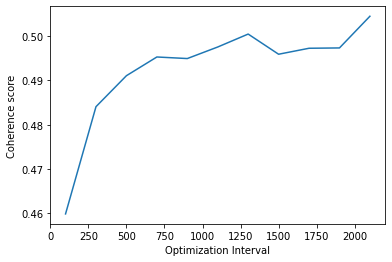

In [49]:
# Show graph
limit=2200; start=100; step=200;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Optimization Interval")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [50]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Interval =", m, 'Coherence: ', round(cv, 4))

Interval = 100 Coherence:  0.4599
Interval = 300 Coherence:  0.4841
Interval = 500 Coherence:  0.4911
Interval = 700 Coherence:  0.4953
Interval = 900 Coherence:  0.4949
Interval = 1100 Coherence:  0.4975
Interval = 1300 Coherence:  0.5004
Interval = 1500 Coherence:  0.4959
Interval = 1700 Coherence:  0.4972
Interval = 1900 Coherence:  0.4973
Interval = 2100 Coherence:  0.5045


In [53]:
# Coherence for alpha-9, iteration 4k, optimization interval 2100, 11-topic model
print(coherence_values[10])

# Topics for alpha-9, iteration 4k, optimization interval 2100, 11-topic model
malletModel_11a9i4ko21 = model_list[10]
model_topics_11a9i4ko21 = malletModel_11a9i4ko21.show_topics(formatted=False)
pprint(sorted(malletModel_11a9i4ko21.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA11a9i4ko21 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_11a9i4ko21)

# Visualize the topics
pyLDAvis.enable_notebook()
vis011a9i4ko21 = pyLDAvis.gensim.prepare(MalletLDA11a9i4ko21, corpus, id2word, sort_topics=False)
vis011a9i4ko21

0.5044714369130452
[(0,
  '0.080*"day" + 0.046*"time" + 0.040*"winter" + 0.037*"summer" + '
  '0.033*"weather" + 0.022*"health" + 0.022*"month" + 0.018*"town" + '
  '0.018*"place" + 0.017*"week" + 0.016*"snow" + 0.015*"year" + '
  '0.014*"country" + 0.012*"spring" + 0.011*"rain" + 0.010*"frost" + '
  '0.010*"air" + 0.010*"heat" + 0.009*"fall" + 0.009*"pleasure"'),
 (1,
  '0.059*"dollar" + 0.051*"work" + 0.047*"money" + 0.026*"year" + '
  '0.026*"pound" + 0.023*"day" + 0.022*"country" + 0.020*"time" + '
  '0.019*"business" + 0.018*"week" + 0.017*"month" + 0.016*"house" + '
  '0.016*"cent" + 0.014*"board" + 0.012*"wage" + 0.012*"place" + 0.011*"man" + '
  '0.010*"pay" + 0.010*"expense" + 0.009*"employment"'),
 (2,
  '0.048*"land" + 0.036*"acre" + 0.034*"farm" + 0.032*"pound" + '
  '0.028*"country" + 0.027*"year" + 0.017*"wheat" + 0.016*"crop" + '
  '0.013*"price" + 0.013*"potato" + 0.013*"bushel" + 0.012*"farmer" + '
  '0.012*"market" + 0.011*"lot" + 0.011*"horse" + 0.011*"wood" + 0.010*

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.010017  0.036446       1        1   9.116523
1      0.081877 -0.133266       2        1   9.084936
2      0.243169 -0.155978       3        1   9.723898
3     -0.231130  0.032991       4        1  10.157594
4     -0.261735 -0.033969       5        1   9.642943
5      0.201335  0.172961       6        1   8.800898
6     -0.061023 -0.121648       7        1   7.583224
7     -0.028347  0.273556       8        1   9.505062
8      0.192753  0.165074       9        1   7.127684
9     -0.208106 -0.002806      10        1  10.094695
10     0.081223 -0.233360      11        1   9.162544, topic_info=        Term         Freq        Total Category  logprob  loglift
11    letter  1519.000000  1519.000000  Default  30.0000  30.0000
55      time  1579.000000  1579.000000  Default  29.0000  29.0000
30   brother   517.000000   517.000000  Default  28.0000  28.0000
416   dollar   461.000000   461.000000  Default  27.0000  27.0000
8        day  1466.000000  1466.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
275     idea    42.903648   123.489928  Topic11  -5.2227   1.3328
649     mind    48.011225   236.467255  Topic11  -5.1102   0.7957
223    world    46.989710   222.756449  Topic11  -5.1317   0.8339
557  respect    39.839102   103.347600  Topic11  -5.2968   1.4368
181     side    42.903648   197.368070  Topic11  -5.2227   0.8639

[992 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
615      10  0.984150  acceptance
28        1  0.158161     account
28        2  0.235313     account
28        4  0.158161     account
28        5  0.219882     account
...     ...       ...         ...
60        6  0.037521   yesterday
60        8  0.656621   yesterday
4207      3  1.003083        yoke
5562      5  0.996097        youe
1109      2  0.976398        yous

[1542 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [54]:
MalletLDA11a9i4k.save('20240610_PhD_TopicLtrMAL11a9i4k')
pyLDAvis.save_html(vis11a9i4k, '20240610_PhD_TopicLtrMAL11a9i4k.html')